<a href="https://colab.research.google.com/github/ujeongmin/ESAA/blob/main/ESAA_HW_9_15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## [04-1 데이터 시각화가 필요한 이유]

### 앤스콤 4분할 그래프

*   데이터 시각화를 보여주는 전형적인 사례


1. 앤스콤 데이터 집합 불러오기
> seaborn 라이브러리에 포함

In [1]:
import seaborn as sns

anscombe = sns.load_dataset("anscombe")
print(anscombe)
print(type(anscombe))

   dataset     x      y
0        I  10.0   8.04
1        I   8.0   6.95
2        I  13.0   7.58
3        I   9.0   8.81
4        I  11.0   8.33
5        I  14.0   9.96
6        I   6.0   7.24
7        I   4.0   4.26
8        I  12.0  10.84
9        I   7.0   4.82
10       I   5.0   5.68
11      II  10.0   9.14
12      II   8.0   8.14
13      II  13.0   8.74
14      II   9.0   8.77
15      II  11.0   9.26
16      II  14.0   8.10
17      II   6.0   6.13
18      II   4.0   3.10
19      II  12.0   9.13
20      II   7.0   7.26
21      II   5.0   4.74
22     III  10.0   7.46
23     III   8.0   6.77
24     III  13.0  12.74
25     III   9.0   7.11
26     III  11.0   7.81
27     III  14.0   8.84
28     III   6.0   6.08
29     III   4.0   5.39
30     III  12.0   8.15
31     III   7.0   6.42
32     III   5.0   5.73
33      IV   8.0   6.58
34      IV   8.0   5.76
35      IV   8.0   7.71
36      IV   8.0   8.84
37      IV   8.0   8.47
38      IV   8.0   7.04
39      IV   8.0   5.25
40      IV  19.0

2. matplotlib 라이브러리로 그래프 그리기

In [28]:
%matplotlib notebook
import matplotlib.pyplot as plt
%matplotlib inline                   # 그래프 출력 안될 때 사용함

3. dataset 열에서 값이 I인 것만 추출 (첫 번째 데이터 그룹 추출)

In [29]:
dataset_1 = anscombe[anscombe['dataset'] == 'I']

4. plot 메서드로 선 그래프 그리기

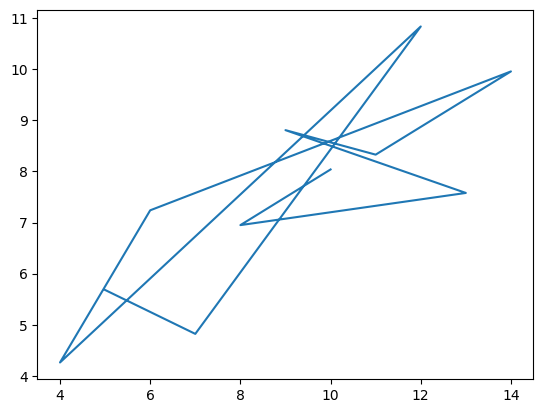

In [30]:
plt.plot(dataset_1['x'], dataset_1['y'])

5. plot 메서드는 기본적으로 선으로 그래프 그림, 점으로 그리려면 o를 세 번째 인자로 추가

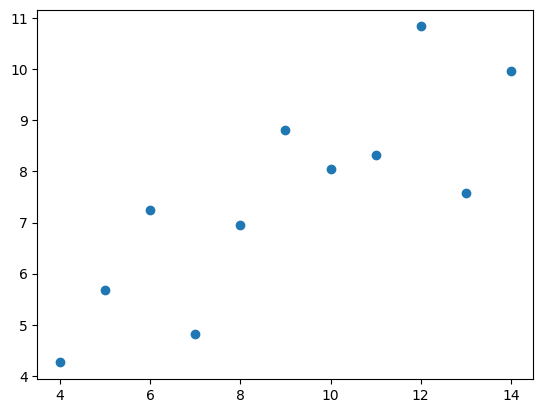

In [31]:
plt.plot(dataset_1['x'], dataset_1['y'],'o')


---

### 앤스콤 데이터 집합 모두 사용해 그래프 만들기
*   4개의 데이터 그룹으로 구성되어 있음
#### matplotlib 라이브러리로 그래프 그리기
> 1. 전체 그래프가 위치할 기본 틀 만들기
> 2. 그래프를 그려 넣을 그래프 격자 만들기
> 3. 격자에 그래프 하나씩 추가, 추가되는 순서는 왼쪽에서 오른쪽 방향
> 4. 만약 격자의 첫 번째 행이 꽉 차면 두 번째 행에 그려넣음  
> ex) 격자 크기가 4라면 세 번째 그래프는 2행 1열 위치에 그려짐

### 한 번에 4개의 그래프 그리기

1. 앤스콤 데이터프레임 불린 추출하여 각각 저장

In [32]:
dataset_2 = anscombe[anscombe['dataset'] == 'II']
dataset_3 = anscombe[anscombe['dataset'] == 'III']
dataset_4 = anscombe[anscombe['dataset'] == 'IV']

2. 그래프 격자가 위치할 기본 틀 만들기

In [33]:
fig = plt.figure()

<Figure size 640x480 with 0 Axes>

3. add_subplot 메서드로 그래프 격자 그리기
> 기본 틀(fig)에 격자를 추가한다는 기분으로 add_subplot 사용  
> 첫 번째 인자에는 그래프 기본 틀의 행 크기  
> 두 번째 인자에는 그래프 기본 틀의 열 크기

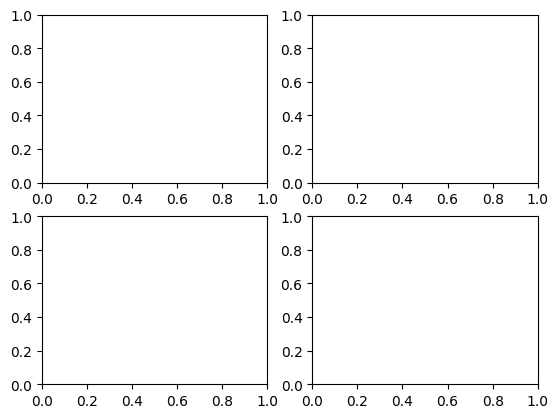

In [35]:
fig = plt.figure()
axes1 = fig.add_subplot(2,2,1)
axes2 = fig.add_subplot(2,2,2)
axes3 = fig.add_subplot(2,2,3)
axes4 = fig.add_subplot(2,2,4)

4. plot 메서드에 데이터를 전달하여 그래프 그리기
> 그래프 확인하려면 fig를 반드시 입력해야 함

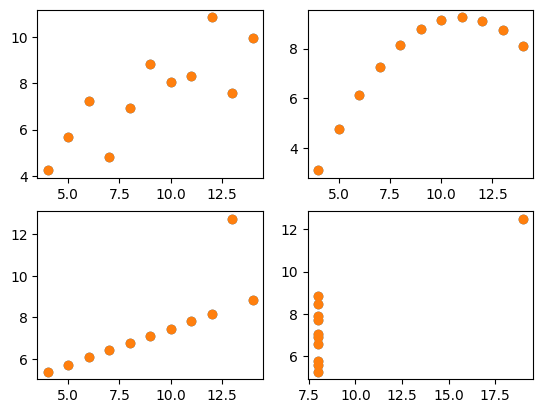

In [37]:
axes1.plot(dataset_1['x'], dataset_1['y'], 'o')
axes2.plot(dataset_2['x'], dataset_2['y'], 'o')
axes3.plot(dataset_3['x'], dataset_3['y'], 'o')
axes4.plot(dataset_4['x'], dataset_4['y'], 'o')
fig

5. 쉽게 구분할 수 있도록 그래프 격자에 제목 추가
> set_title 메서드 사용

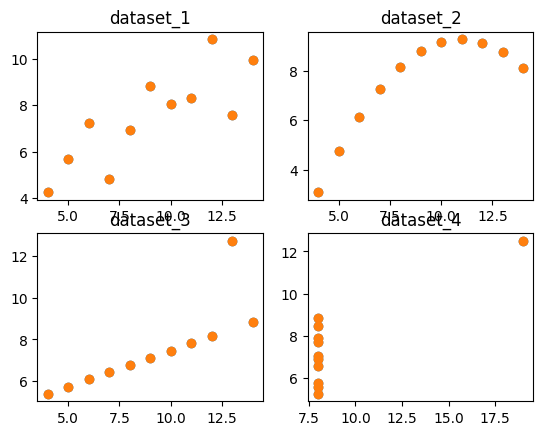

In [40]:
axes1.set_title("dataset_1")
axes2.set_title("dataset_2")
axes3.set_title("dataset_3")
axes4.set_title("dataset_4")
fig

6. 기본 틀(fig)에도 제목 추가해보기
> suptitle 메서드 사용

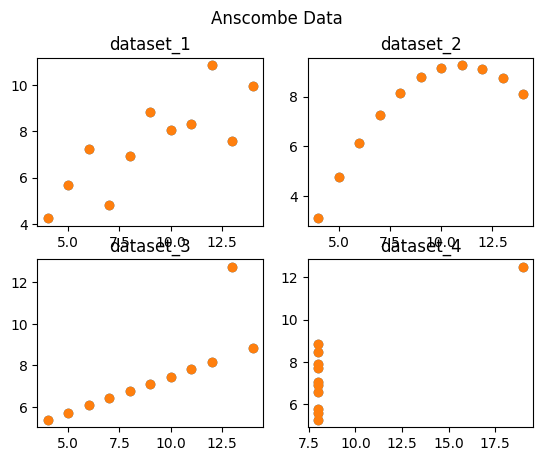

In [41]:
fig.suptitle("Anscombe Data")
fig

7. 그래프 이름과 숫자가 겹치는 현상 수정
> tight_layout 메서드 사용하여 그래프의 레이아웃 조절

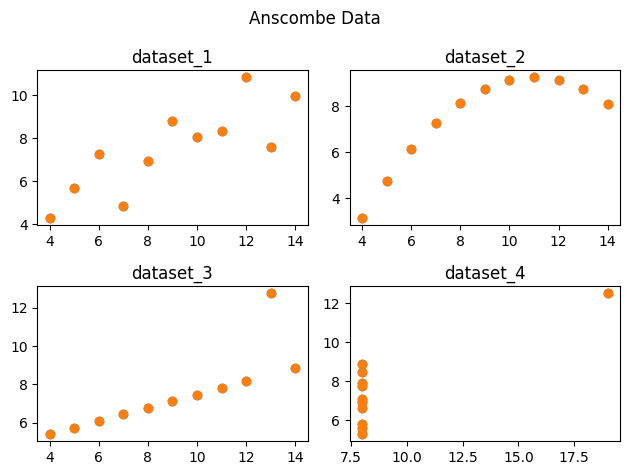

In [42]:
fig.tight_layout()
fig



---


## [04-2 matplotlib 라이브러리 자유자재로 사용하기]

### 기초 그래프 그리기
* 어떤 식당에서 팁을 지불한 손님의 정보를 모아둔 tips 데이터 집합 사용

### 기초 그래프 그리기 - 히스토그램, 산점도 그래프, 박스 그래프
1. tips 변수에 데이터 집합 저장

In [43]:
tips = sns.load_dataset("tips")
print(tips.head())
print(type(tips))

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
<class 'pandas.core.frame.DataFrame'>


2. 히스토그램
> 데이터프레임의 열 데이터 분포와 빈도를 살펴보는 용도  
> 변수(열 데이터) 하나만 사용해서 그린 그래프를 일변량 그래프 라고 부름

3. 기본 틀(fig) 마련, 그래프 격자(axes1) 구성 (앞과 동일)

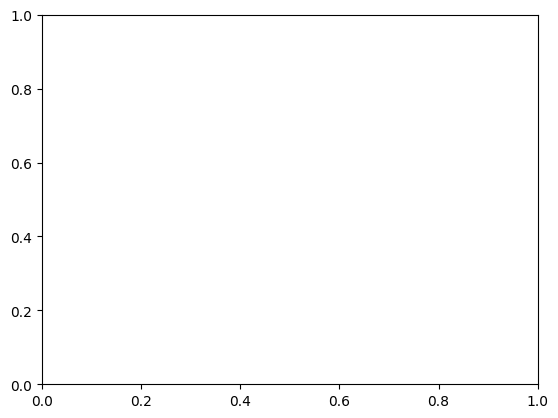

In [50]:
fig = plt.figure()
axes1 = fig.add_subplot(1,1,1)

4. hist 메서드에 total_bill 열 입력
> bins : x축 간격 조절  
> 나머지는 그래프의 제목, xy축의 제목 추가



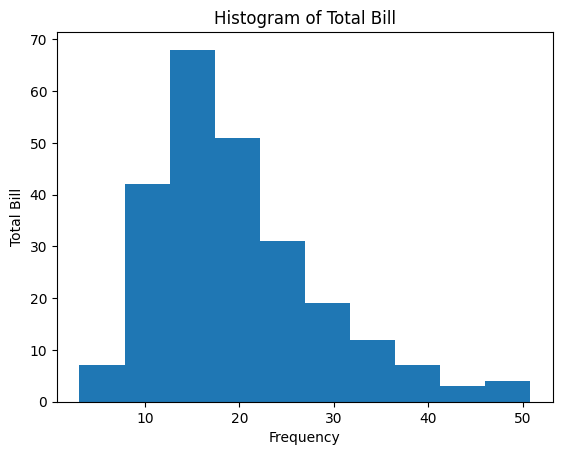

In [51]:
axes1.hist(tips['total_bill'], bins=10)
axes1.set_title('Histogram of Total Bill')
axes1.set_xlabel('Frequency')
axes1.set_ylabel('Total Bill')
fig

5. 산점도 그래프
> 변수 2개를 사용해서 만드는 그래프인 이변량 그래프

6. 기본 틀과 그래프 격자 만들고 scatter 메서드에 total_bill, tips 열 전달

Text(0, 0.5, 'Tip')

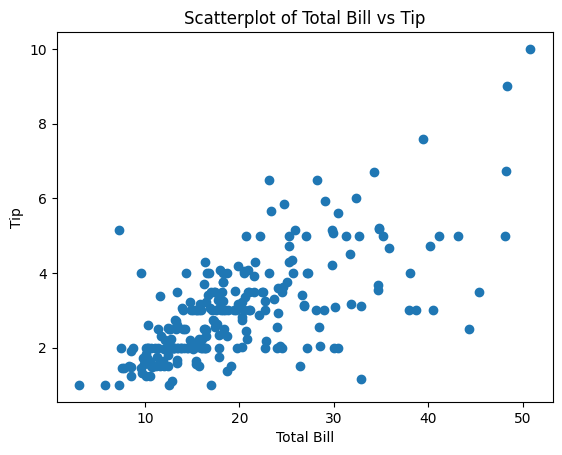

In [53]:
scatter_plot = plt.figure()
axes1 = scatter_plot.add_subplot(1,1,1)
axes1.scatter(tips['total_bill'],tips['tip'])
axes1.set_title('Scatterplot of Total Bill vs Tip')
axes1.set_xlabel('Total Bill')
axes1.set_ylabel('Tip')

7. 박스 그래프
> 이산형 변수와 연속형 변수를 함께 사용하는 그래프  
> 예를 들면 이산형은 Female,Male / 연속형은 Tip

8. boxplot 메서드 사용
> 첫 번째 인자는 성별이 Female/Male인 데이터에서 tip 열 데이터만 추출하여 리스트에 담아 전달한 것  
> 두 번째 인자는 labels로 성별을 구분하기 위한 이름 추가

Text(0.5, 1.0, 'Boxplot of Tips by Sex')

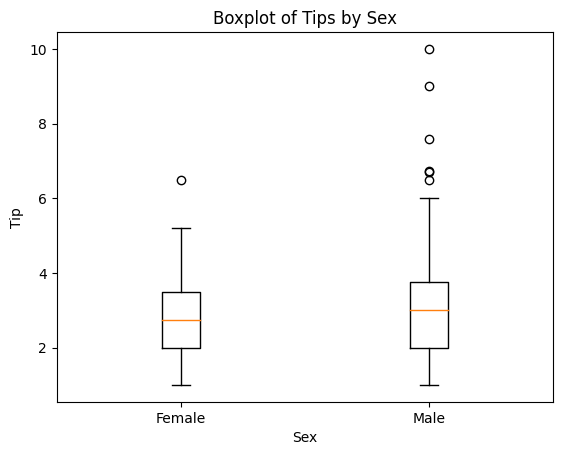

In [56]:
boxplot = plt.figure()
axes1 = boxplot.add_subplot(1,1,1)
axes1.boxplot([tips[tips['sex'] == 'Female']['tip'],
              tips[tips['sex'] == 'Male']['tip']],
               labels = ['Female', 'Male'])
axes1.set_xlabel('Sex')
axes1.set_ylabel('Tip')
axes1.set_title('Boxplot of Tips by Sex')



---

#### 다변량 그래프 그리기
* 3개 이상의 변수를 사용한 그래프



#### 다변량 데이터로 다변량 그래프 그리기 - 산점도 그래프
1. 앞의 산점도 그래프(scatter)에 새 변수 추가
> 문자열은 0, 1과 같은 정수로 치환해서 색상을 구분

In [57]:
def recode_sex(sex):
  if sex == 'Female':
    return 0
  else:
    return 1

2. redoce_sex 메서드가 반환한 값(0,1)을 데이터프레임에 추가
> sex_color 열을 새로 생성하여 추가  
> sex 열에 recode_sex 함수를 브로드캐스팅하기 위하여 apply 메서드 사용

In [58]:
tips['sex_color'] = tips['sex'].apply(recode_sex)

3. 테이블당 인원 수(size)도 산점도 그래프에 추가
> scatter 메서드에 s,c 인잣값으로 테이블당 인원 수와 성별의 치환값 전달  
> s는 점의 크기(size), c는 점의 색상(color), alpha는 점의 투명도

Text(0, 0.5, 'Tip')

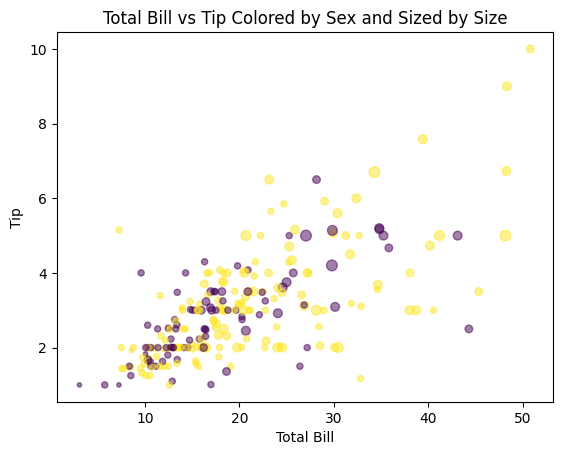

In [59]:
scatter_plot = plt.figure()
axes1 = scatter_plot.add_subplot(1,1,1)
axes1.scatter(
    x = tips['total_bill'],
    y = tips['tip'],
    s = tips['size'] * 10,
    c = tips['sex_color'],
    alpha = 0.5
)
axes1.set_title('Total Bill vs Tip Colored by Sex and Sized by Size')
axes1.set_xlabel('Total Bill')
axes1.set_ylabel('Tip')



---


## [04-3 seaborn 라이브러리 자유자재로 사용하기]
* matplotlib에 비해 더 화려한 그래프 그릴 수 있음


### 단변량 그래프 그리기 - 히스토그램
1. seaborn 라이브러리, tips 데이터 집합 불러오기

In [60]:
import seaborn as sns

tips = sns.load_dataset("tips")

2. seaborn 라이브러리로 히스토그램 그리기
> subplots, distplot 메서드 사용  
> subplots 메서드로 기본 틀 만들고 distplot 메서드에 열 데이터 전달

<ipython-input-61-071bdf8959b6>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(tips['total_bill'])


Text(0.5, 1.0, 'Total Bill Histogram with Density Plot')

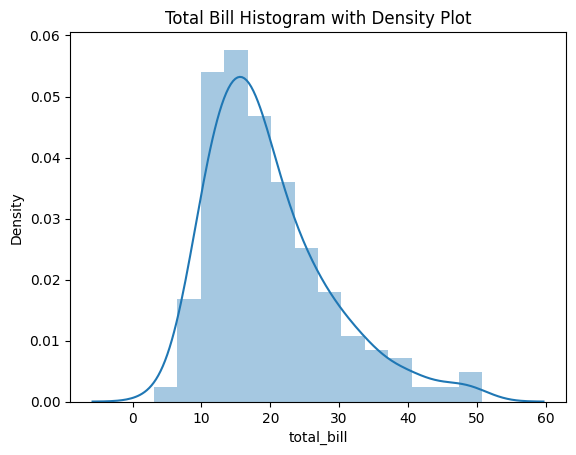

In [61]:
ax = plt.subplots()
ax = sns.distplot(tips['total_bill'])
ax.set_title('Total Bill Histogram with Density Plot')

3. displot 메서드 사용하면 히스토그램과 밀집도 그래프 같이 그림
> 밀집도 그래프를 제외하고 싶다면 kde=False 설정

<ipython-input-62-29ef41561e71>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(tips['total_bill'], kde=False)


Text(0, 0.5, 'Frequency')

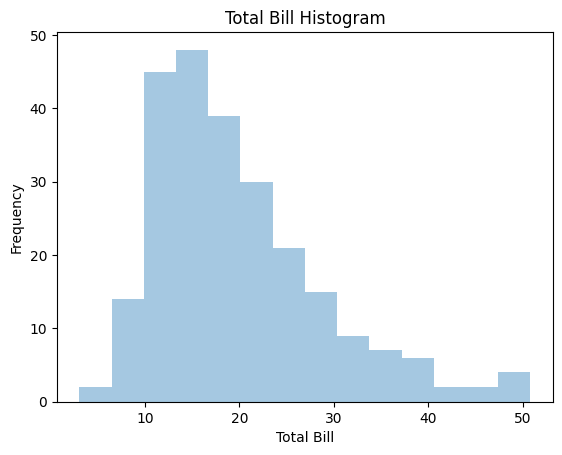

In [62]:
ax = plt.subplots()
ax = sns.distplot(tips['total_bill'], kde=False)
ax.set_title('Total Bill Histogram')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Frequency')

4. 밀집도 그래프만 나타내려면 (히스토그램 제외) hist=False 설정

<ipython-input-64-a21e362b801d>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(tips['total_bill'], hist=False)


Text(0, 0.5, 'Unit Probability')

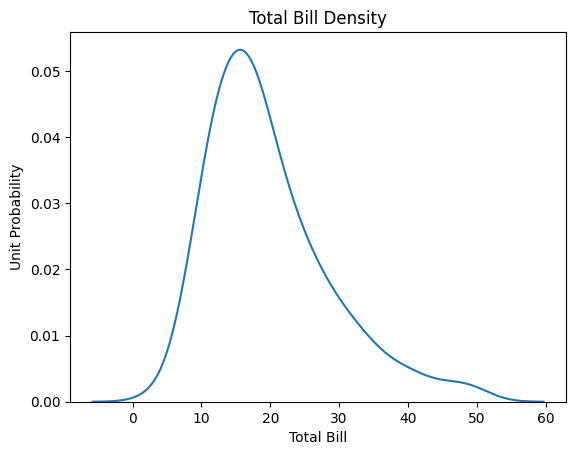

In [64]:
ax = plt.subplots()
ax = sns.distplot(tips['total_bill'], hist=False)
ax.set_title('Total Bill Density')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Unit Probability')

5. 히스토그램&밀집도 그리는 distplot 메서드에 rug=True 추가하여 양탄자 그래프까지 그리기

<ipython-input-65-d736abba20f9>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(tips['total_bill'], rug=True)


Text(0.5, 0, 'Total Bill')

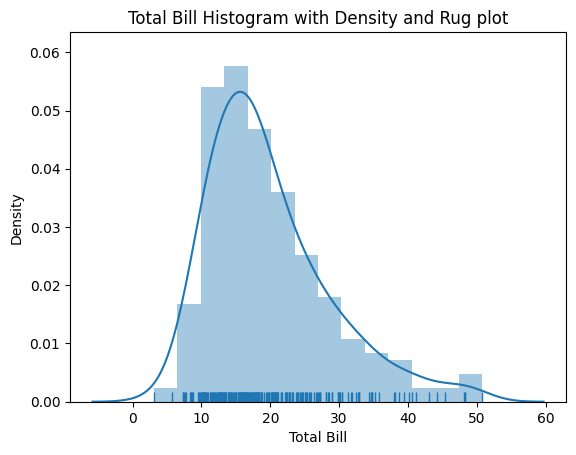

In [65]:
ax = plt.subplots()
ax = sns.distplot(tips['total_bill'], rug=True)
ax.set_title('Total Bill Histogram with Density and Rug plot')
ax.set_xlabel('Total Bill')

6. 히스토그램과 비슷하게 생긴 count 그래프 그리기
> 이산값을 나타낸 그래프, countplot 메서드 사용

Text(0, 0.5, 'Frequency')

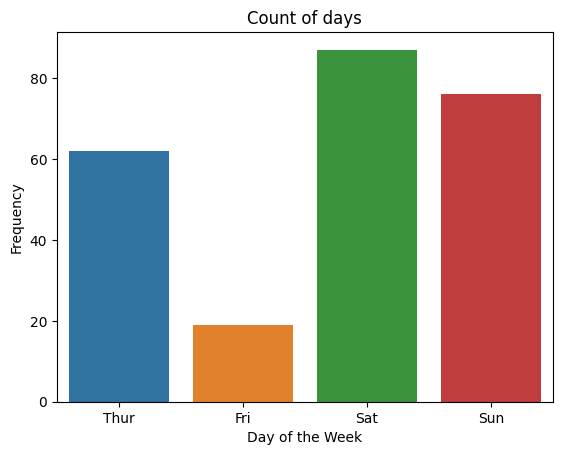

In [69]:
ax = plt.subplots()
ax = sns.countplot(x='day', data = tips)
ax.set_title('Count of days')
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Frequency')



---


### 다양한 종류의 이변량 그래프 그리기
1. seaborn 라이브러리로 산점도 그래프 그리기
> regplot 메서드 사용  
> 산점도 그래프와 회귀선 함께 그릴 수 있음  
> 회귀선 제거하려면 fit_reg=False 설정

Text(0, 0.5, 'Tip')

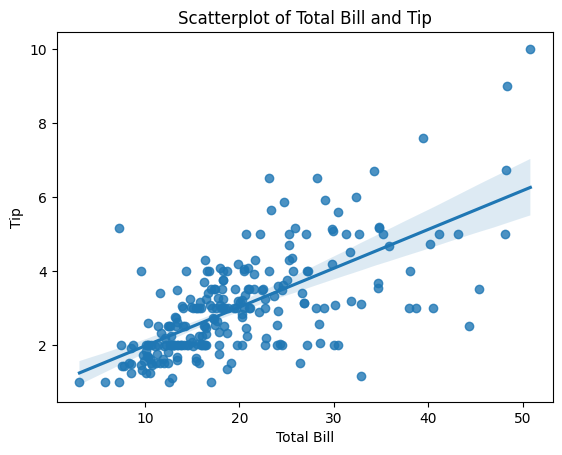

In [71]:
ax = plt.subplots()
ax = sns.regplot(x='total_bill', y='tip', data=tips)
ax.set_title('Scatterplot of Total Bill and Tip')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')

Text(0, 0.5, 'Tip')

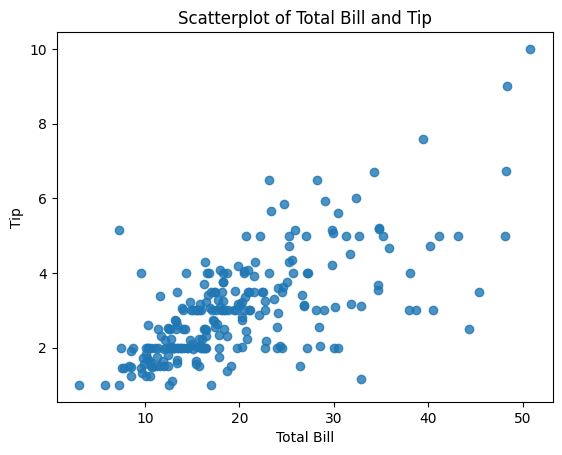

In [72]:
ax = plt.subplots()
ax = sns.regplot(x='total_bill', y='tip', data=tips, fit_reg=False)
ax.set_title('Scatterplot of Total Bill and Tip')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')

2. 산점도 그래프와 히스토그램 한 번에 그려주는 jointplot 메서드 사용

Text(0.5, 1.03, 'Joint Plot of Total Bill and Tip')

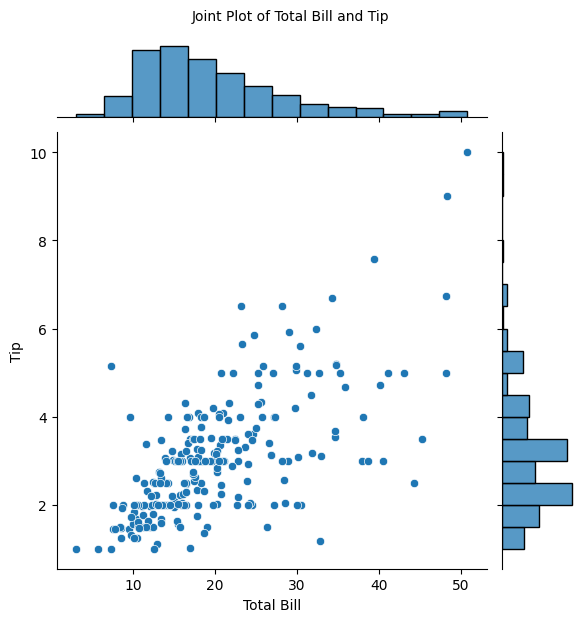

In [74]:
joint = sns.jointplot(x='total_bill', y='tip', data=tips)
joint.set_axis_labels(xlabel='Total Bill', ylabel='Tip')
joint.fig.suptitle('Joint Plot of Total Bill and Tip', fontsize=10, y=1.03)

3. 산점도 그래프는 점이 겹쳐 보일 경우 구분하기 어렵다는 단점
> 육각 그래프(hexbin) 사용  
> 2차원 표면에 육각형으로 데이터를 쌓아 표현하는 그래프  
> jointplot 메서드 그래도 사용, 대신 인자에 kind=hex 지정

Text(0.5, 1.03, 'Hexbin Plot of Total Bill and Tip')

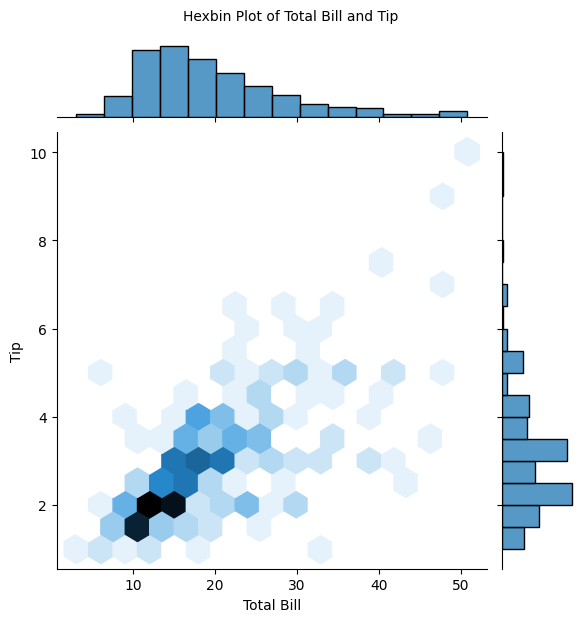

In [76]:
hexbin = sns.jointplot(x='total_bill', y='tip', data=tips, kind='hex')
hexbin.set_axis_labels(xlabel='Total Bill', ylabel='Tip')
hexbin.fig.suptitle('Hexbin Plot of Total Bill and Tip', fontsize=10, y=1.03)

4. 이차원 밀집도 그리기
> kdeplot 메서드 사용  
> shade=True 설정 시 그래프에 음영 효과 줄 수 있음

<ipython-input-80-9876348b2934>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(x=tips['total_bill'],


Text(0, 0.5, 'Tip')

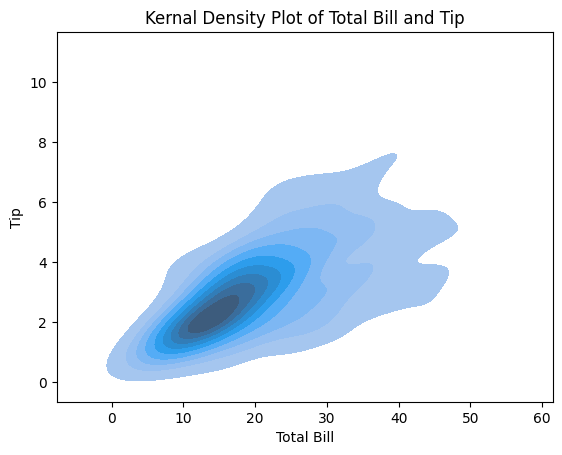

In [80]:
ax = plt.subplots()
ax = sns.kdeplot(x=tips['total_bill'], y=tips['tip'], shade=True)
ax.set_title('Kernal Density Plot of Total Bill and Tip')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')

5. 바 그래프 그리기
> 지정한 변수의 평균을 계산하여 그릴 수 있음

Text(0, 0.5, 'Average total bill')

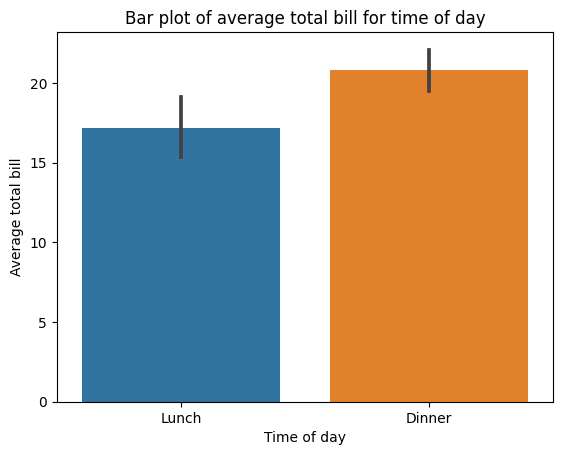

In [82]:
ax = plt.subplots()
ax = sns.barplot(x='time', y='total_bill', data=tips)               # 칼럼명만 쓴다면 뒤에 data= 써야하고 df[칼럼명] 쓰면 data= 안써도 되는 듯
ax.set_title('Bar plot of average total bill for time of day')
ax.set_xlabel('Time of day')
ax.set_ylabel('Average total bill')

6. 박스 그래프 그리기
> 최솟값, 1분위수, 중간값, 3분위수, 최댓값, 이상치 등 다양한 통계량을 한 번에 표현하는 그래프

Text(0, 0.5, 'Total Bill')

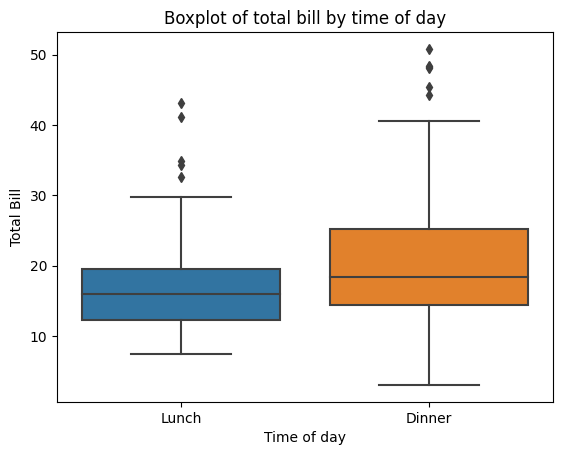

In [83]:
ax = plt.subplots()
ax = sns.boxplot(x='time', y='total_bill', data=tips)
ax.set_title('Boxplot of total bill by time of day')
ax.set_xlabel('Time of day')
ax.set_ylabel('Total Bill')

7. 박스 그래프는 데이터 분산이 모호하게 표현됨
> 박스 그래프에 커널 밀도를 추정한 바이올린 그래프 사용  
> violinplot 메서드 사용

Text(0, 0.5, 'Total Bill')

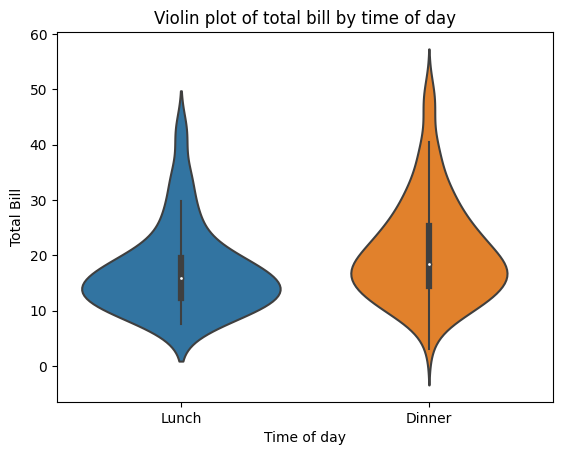

In [84]:
ax = plt.subplots()
ax = sns.violinplot(x='time', y='total_bill', data=tips)
ax.set_title('Violin plot of total bill by time of day')
ax.set_xlabel('Time of day')
ax.set_ylabel('Total Bill')

8. 관계 그래프 그리기
> 지금까지 설명한 그래프를 종합한 그래프  
> pairplot 메서드 사용

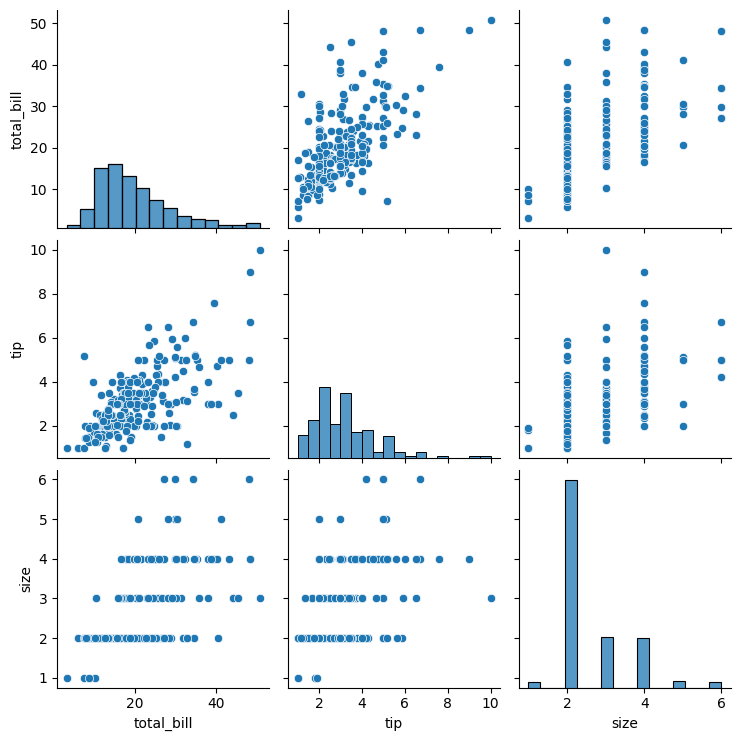

In [86]:
fig = sns.pairplot(tips)

9. 관계 그래프는 중복된 정보가 표현된다는 단점
> 즉 관계 그래프의 절반(대각선 위)는 나머지 절반과 같음  
> 중복된 그래프가 그려지는 위치를 직접 지정하여 원하는 그래프로 교체하면 됨  
> map_upper 메서드는 대각선 위쪽에 그릴 그래프 지정  
> map_lower 메서드는 대각선 아래쪽에 그릴 그래프 지정

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1544: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(x=data_k, label=label_k, color=color, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1544: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(x=data_k, label=label_k, color=colo

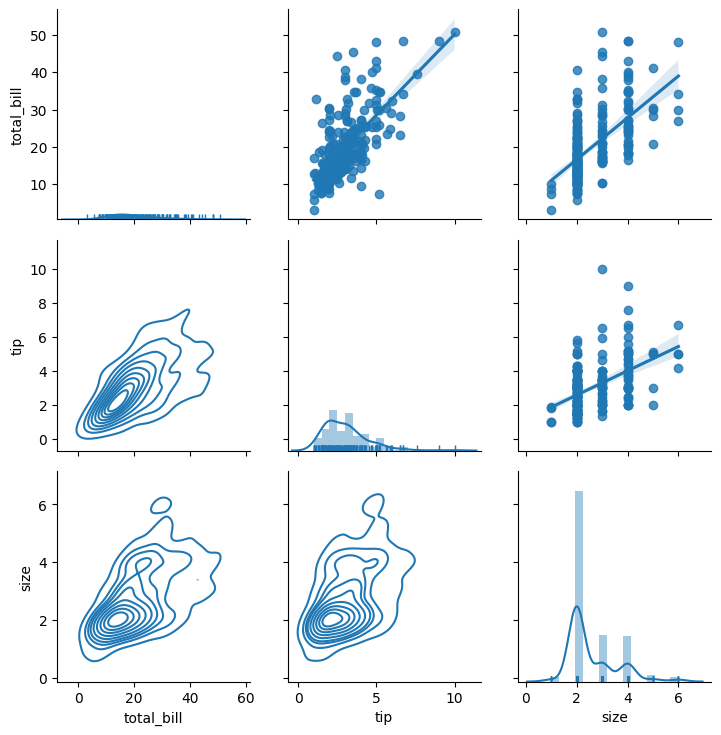

In [87]:
pair_grid = sns.PairGrid(tips)
pair_grid = pair_grid.map_upper(sns.regplot)
pair_grid = pair_grid.map_lower(sns.kdeplot)
pair_grid = pair_grid.map_diag(sns.distplot,rug=True)
plt.show()



---

#### seaborn 라이브러리로 다변량 그래프 그리기

1. seaborn 라이브러리로 바이올린 그래프 그리기 - 색상 추가
> violinplot 메서드에 hue 인자로 색상에 사용할 열 이름 추가

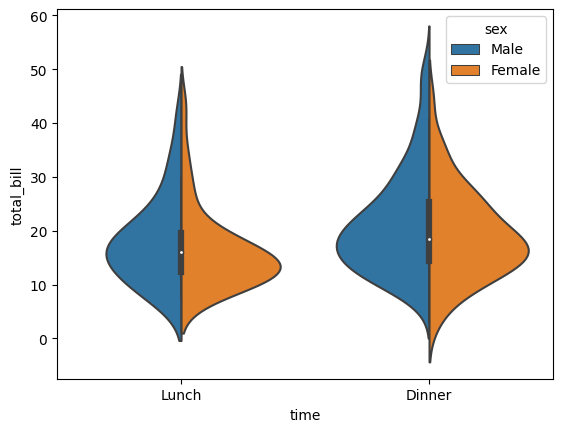

In [88]:
ax = plt.subplots()
ax = sns.violinplot(x='time', y='total_bill', hue='sex', data=tips, split=True)

2. 산점도, 관계 그래프 그리기 - 색상 추가

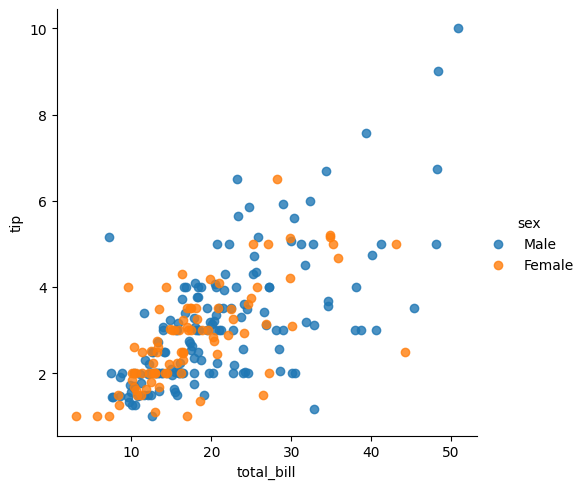

In [90]:
scatter = sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex', fit_reg=False)

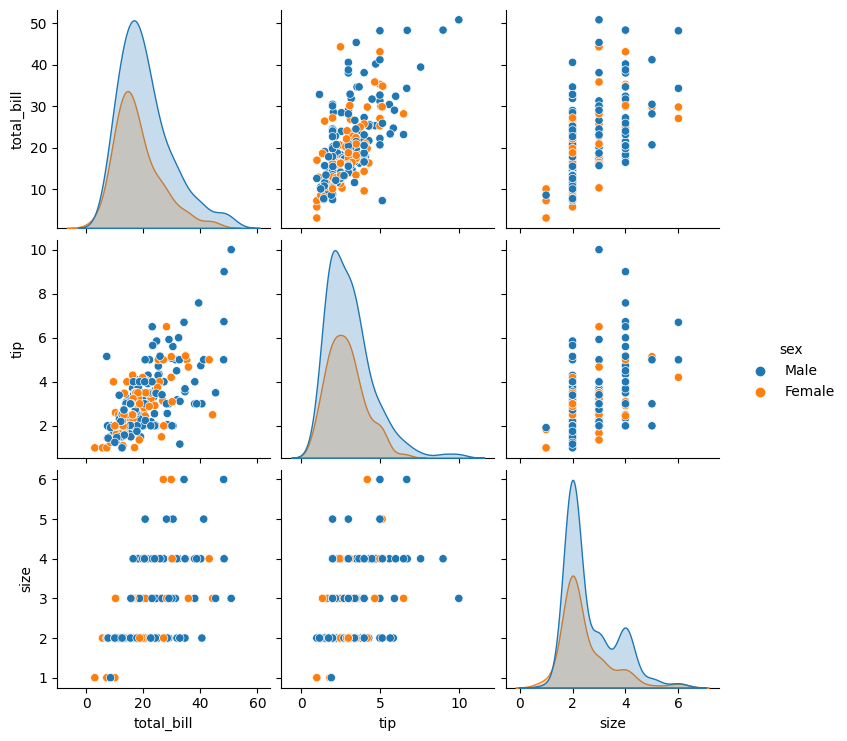

In [91]:
fig = sns.pairplot(tips, hue='sex')

3. 산점도 그래프의 크기와 모양 조절하기
> scatter_kws에 딕셔너리 형태로 인자값 넣기  
> 아래는 's':tips['size']를 딕셔너리에 담아 크기 조절함

In [102]:
# scatter = sns.lmplot(x='total_bill', y='tip', data=tips, fit_reg=False, hue='sex', scatter_kws={'s':tips['size']*10})

4. 산점도 그래프의 점을 다른 기호로 표현하고 싶다면 markers 인자로 지정

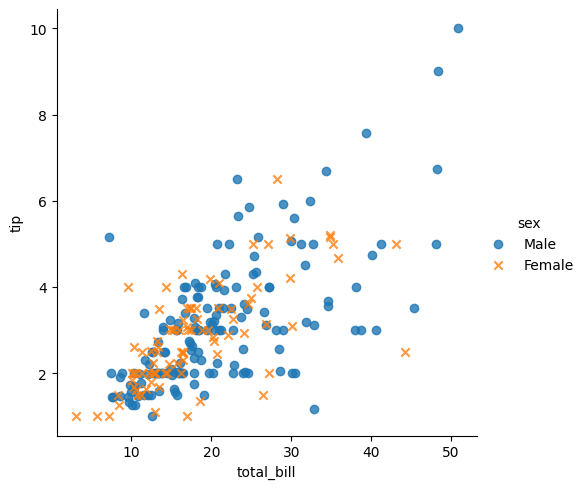

In [98]:
scatter = sns.lmplot(x='total_bill', y='tip', data=tips, fit_reg=False, hue='sex', markers=['o','x'])

5. lmplot 메서드로 4개의 데이터 그룹에 대한 그래프 한 번에 그리기

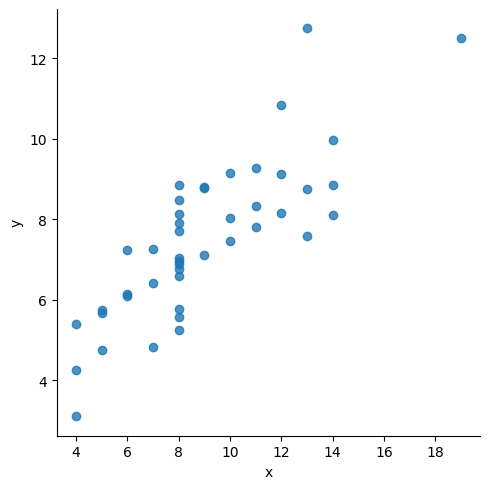

In [103]:
anscombe_plot = sns.lmplot(x='x',y='y',data=anscombe,fit_reg=False)

6. lmplot 메서드에 추가로 col, col_wrap 인자 설정
> col 인자에는 데이터 그룹을 구분할 열 지정  
> col_wrap 인자에는 그래프를 그릴 열의 최댓값 지정

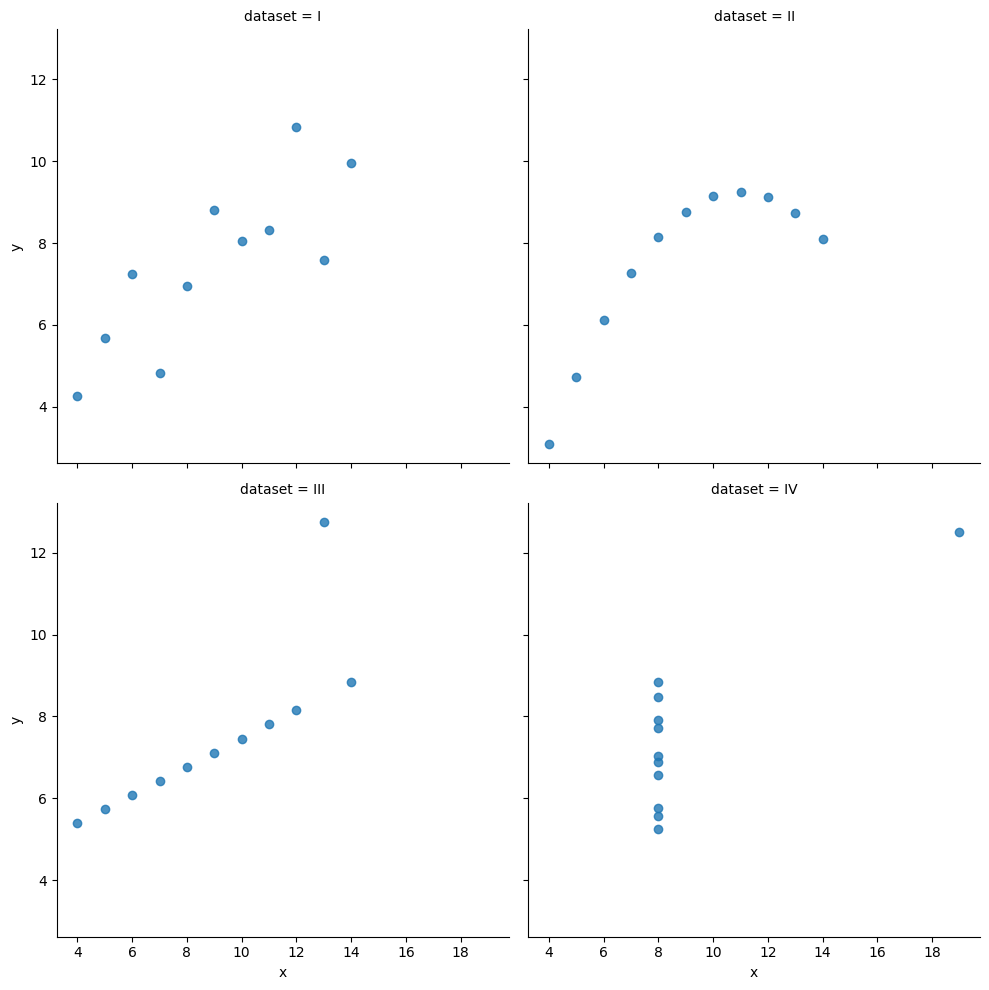

In [104]:
anscombe_plot = sns.lmplot(x='x', y='y', data=anscombe, fit_reg=False, col='dataset', col_wrap=2)

#### FacetGrid 클래스로도 그룹별 그래프를 그릴 수 있다
> 먼저 FacetGrid에 데이터프레임, 그룹을 구분할 열 이름 전달  
> 그리고 map 메서드에 그래프의 종류, x축 열 이름 전달

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


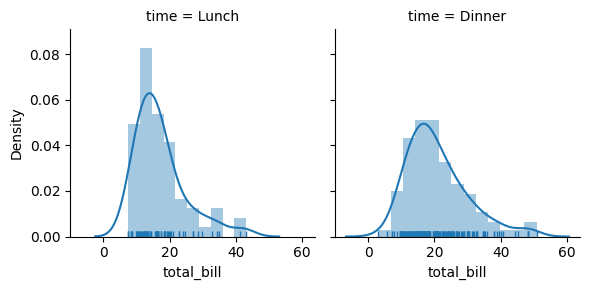

In [105]:
facet = sns.FacetGrid(tips, col='time')
facet.map(sns.distplot, 'total_bill', rug=True)

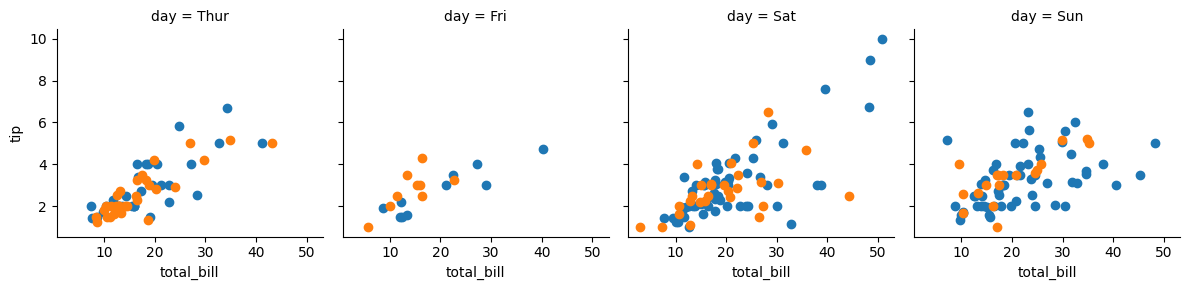

In [110]:
facet = sns.FacetGrid(tips, col='day', hue='sex')
facet = facet.map(plt.scatter, 'total_bill', 'tip')
# facet = facet.add_legned()

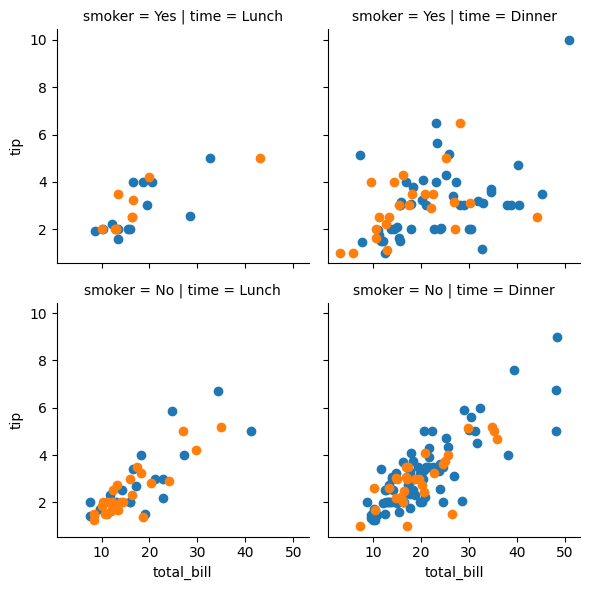

In [112]:
facet = sns.FacetGrid(tips, col='time', row='smoker', hue='sex')
facet.map(plt.scatter, 'total_bill', 'tip')



---

## [04-4 데이터프레임과 시리즈로 그래프 그리기]

### 데이터프레임과 시리즈로 그래프 그리기
1. plot.hist 메서드 사용하면 해당 시리즈의 값을 이용하여 바로 그릴 수 있음

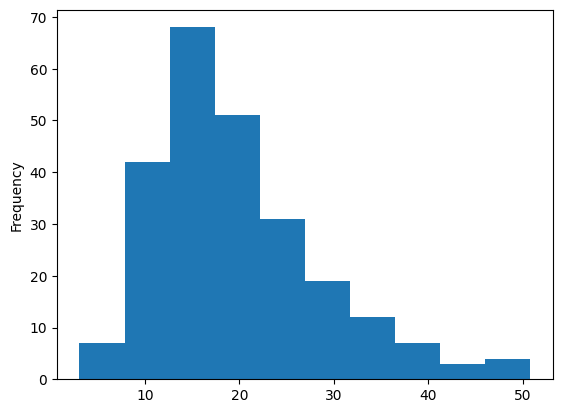

In [113]:
ax = plt.subplots()
ax = tips['total_bill'].plot.hist()

2. 투명도 조절은 alpha, bins, ax 인자 사용

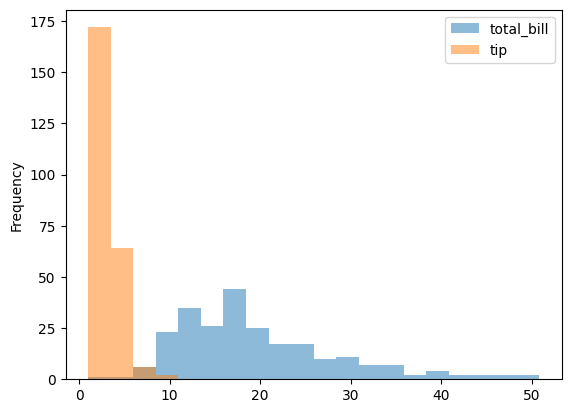

In [114]:
fig, ax = plt.subplots()
ax = tips[['total_bill', 'tip']].plot.hist(alpha=0.5, bins=20, ax=ax)      # 2개의 시리즈 선택함

3. 밀집도, 산점도 그래프, 육각 그래프는 각각 kde, scatter, hexbin 메서드 사용

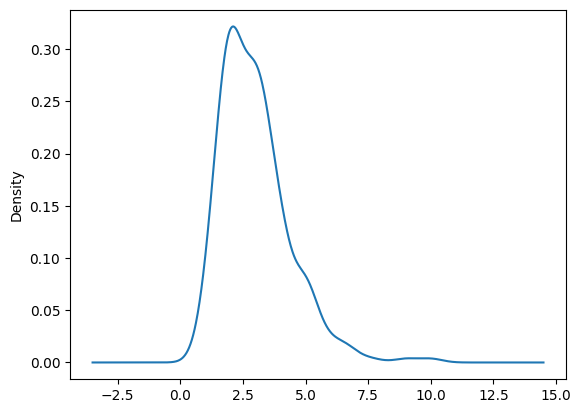

In [115]:
ax = plt.subplots()
ax = tips['tip'].plot.kde()

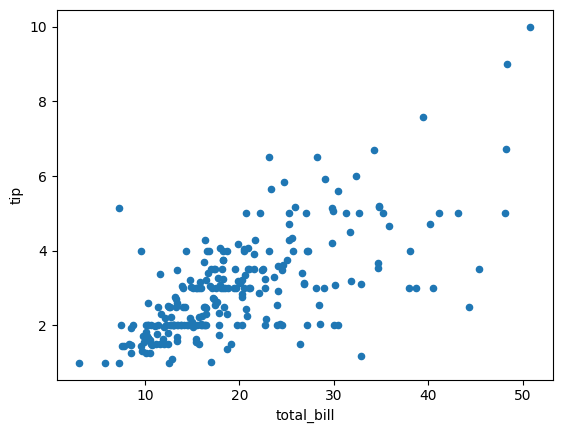

In [116]:
fig, ax = plt.subplots()
ax = tips.plot.scatter(x='total_bill', y='tip', ax=ax)

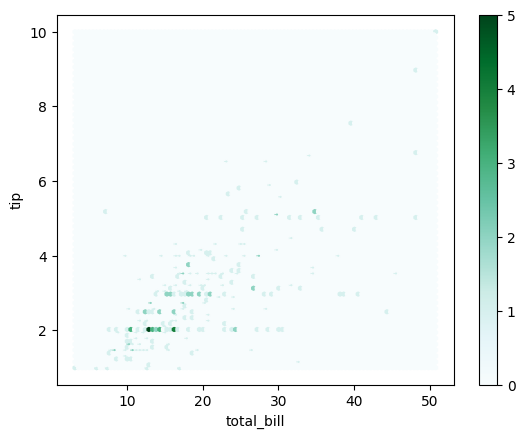

In [117]:
fig, ax = plt.subplots()
ax = tips.plot.hexbin(x='total_bill', y='tip', ax=ax)

4. 육각 그래프의 육각형 크기는 gridsize 인자를 사용하여 변경

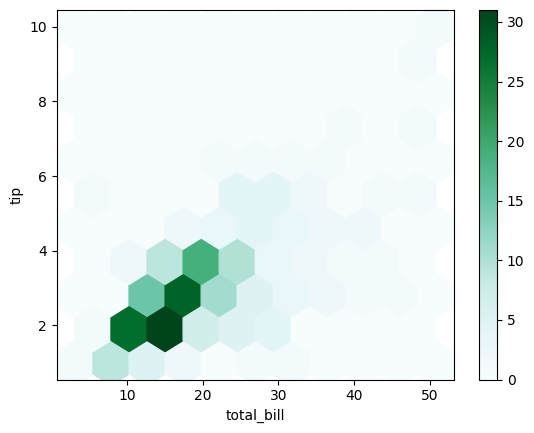

In [118]:
fig, ax = plt.subplots()
ax = tips.plot.hexbin(x='total_bill', y='tip', gridsize = 10, ax=ax)

5. box 메서드를 사용하여 그린 박스 그래프

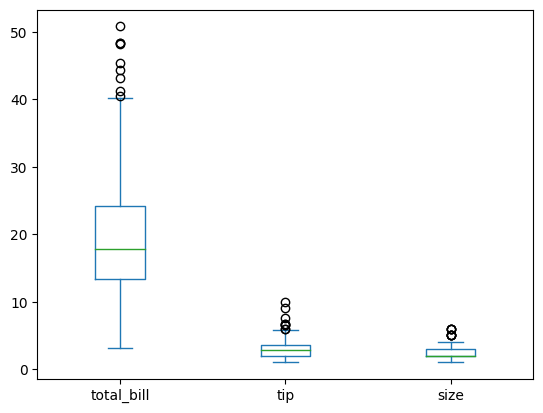

In [119]:
fig, ax = plt.subplots()
ax = tips.plot.box(ax=ax)



---

## [04-5 seaborn 라이브러리로 그래프 스타일 설정하기]
* seaborn 라이브러리로 만든 그래프는 모두 기본 스타일이었음
* 스타일은 set_style 메서드로 바꿀 수 있음
> 한번 지정하면 그 이후 그래프가 지정한 스타일로 바뀜



### 그래프에 스타일 적용하기

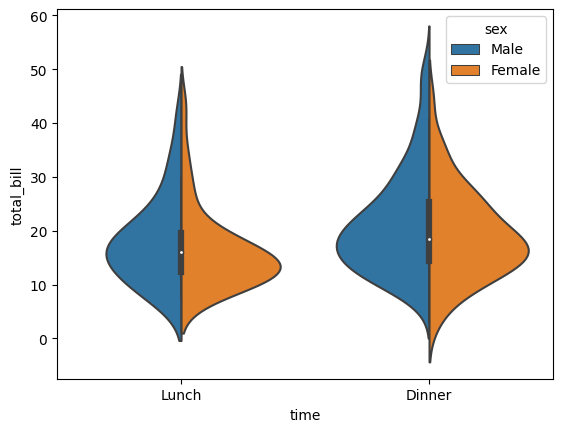

In [120]:
fig, ax = plt.subplots()
ax = sns.violinplot(x='time', y='total_bill', hue='sex', data=tips, split=True)

2. whitegrid로 스타일 설정 : 배경에 가로 줄 생김

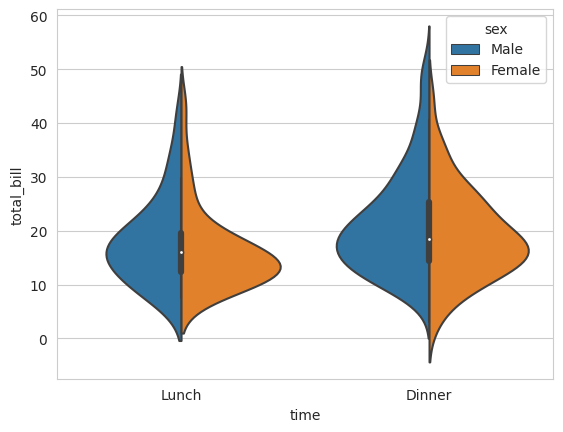

In [121]:
sns.set_style('whitegrid')
fig, ax = plt.subplots()
ax = sns.violinplot(x='time', y='total_bill', hue='sex', data=tips, split=True)

3. for문을 이용하여 모든 스타일을 하나씩 적용한 그래프

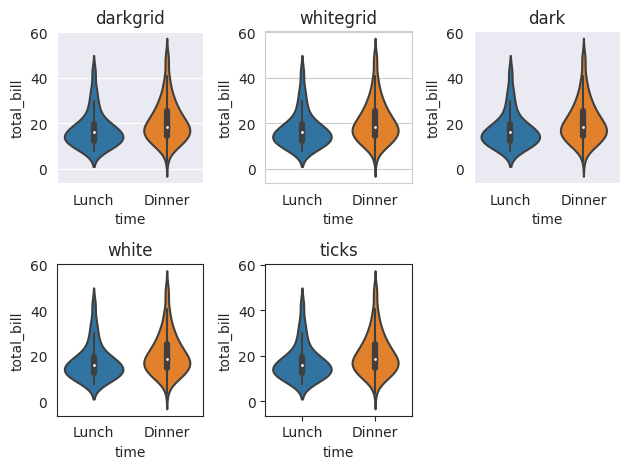

In [122]:
fig = plt.figure()
seaborn_styles = ['darkgrid', 'whitegrid', 'dark', 'white', 'ticks']

for idx, style in enumerate(seaborn_styles):
  plot_position = idx + 1
  with sns.axes_style(style):
    ax = fig.add_subplot(2,3,plot_position)
    violin = sns.violinplot(x='time', y='total_bill', data=tips, ax=ax)
    violin.set_title(style)

fig.tight_layout()